In [1]:
import os
import numpy as np
import pandas as pd
import pickle

In [2]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
INPUT_DIR = '../input/ieee-fraud-detection-dataprocessing'
data = {}
files = os.listdir(INPUT_DIR)
for file in files:
    if 'Xtrain' in file:
        data['Xtrain'] = INPUT_DIR + '/' + file
    if 'Ytrain' in file:
        data['Ytrain'] = INPUT_DIR + '/' + file
    if 'Xtest' in file:
        data['Xtest'] = INPUT_DIR + '/' + file
data

{'Xtest': '../input/ieee-fraud-detection-dataprocessing/Xtest-IEEE-CIS-Fraud-Detection.data',
 'Xtrain': '../input/ieee-fraud-detection-dataprocessing/Xtrain-IEEE-CIS-Fraud-Detection.data',
 'Ytrain': '../input/ieee-fraud-detection-dataprocessing/Ytrain-IEEE-CIS-Fraud-Detection.data'}

In [5]:
Xtrain = pickle.load(open(data['Xtrain'], 'rb'))
Xtrain.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_34_match_status:1,id_34_match_status:2,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0.000214,0.000000,0.000628,0.0,0.000343,0.0007,0.000176,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2987001,0.000214,0.000000,0.000314,0.0,0.000343,0.0007,0.000176,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2987002,0.000214,0.000000,0.000314,0.0,0.000343,0.0007,0.000176,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2987003,0.000427,0.000000,0.000314,0.0,0.008568,0.0007,0.000878,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2987004,0.000214,0.000307,0.000314,0.0,0.000343,0.0007,0.000176,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [6]:
Ytrain = pickle.load(open(data['Ytrain'], 'rb'))
Ytrain.head()

TransactionID
2987000    0
2987001    0
2987002    0
2987003    0
2987004    0
Name: isFraud, dtype: int64

In [7]:
Xtest = pickle.load(open(data['Xtest'], 'rb'))
Xtest.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_34_match_status:1,id_34_match_status:2,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,0.001281,0.0,0.001569,0.000314,0.039398,0.0042,0.001054,0.0,0.0,0.008598,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663550,0.000640,0.0,0.000314,0.000314,0.004112,0.0014,0.000351,0.0,0.0,0.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663551,0.000427,0.0,0.000628,0.000000,0.007538,0.0014,0.000351,0.0,0.0,0.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663552,0.001067,0.0,0.000628,0.000000,0.002399,0.0028,0.000351,0.0,0.0,0.002865,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663553,0.001281,0.0,0.001882,0.000000,0.004799,0.0042,0.001054,0.0,0.0,0.005730,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [8]:
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [10]:
earlystop = EarlyStopping(patience=15, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(patience=5, verbose=1, cooldown=10)

callbacks = [earlystop, reduce_lr]

In [11]:
clf = Sequential()

clf.add(Dense(units=400, activation='relu', input_dim=598))
clf.add(Dropout(rate=0.1))

clf.add(Dense(units=400, activation='relu'))
clf.add(Dropout(rate=0.1))

clf.add(Dense(units=400, activation='relu'))
clf.add(Dropout(rate=0.1))

clf.add(Dense(units=1, activation='sigmoid'))

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               239600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_3 (Dropout)  

In [12]:
history = clf.fit(Xtrain, Ytrain, epochs=250, batch_size=64, validation_data=(Xval, Yval), callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 1025778 samples, validate on 113976 samples
Epoch 1/250
1025778/1025778 [==============================] - 66s 65us/step - loss: 0.4095 - acc: 0.8100 - val_loss: 0.3548 - val_acc: 0.8407
Epoch 2/250
1025778/1025778 [==============================] - 64s 63us/step - loss: 0.3385 - acc: 0.8471 - val_loss: 0.3015 - val_acc: 0.8645
Epoch 3/250
1025778/1025778 [==============================] - 65s 63us/step - loss: 0.2987 - acc: 0.8666 - val_loss: 0.2546 - val_acc: 0.8902
Epoch 4/250
1025778/1025778 [==============================] - 70s 68us/step - loss: 0.2698 - acc: 0.8809 - val_loss: 0.2346 - val_acc: 0.8989
Epoch 5/250
1025778/1025778 [==============================] - 70s 68us/step - loss: 0.2491 - acc: 0.8915 - val_loss: 0.2110 - val_acc: 0.9128
Epoch 6/250
1025778/1025778 [==============================] - 70s 68us/step - loss: 0.2327 - acc: 0.8993 - val_loss: 0.1928 - val_acc: 0.9200
Epoch 7/250
1025778/1025778 [============

In [13]:
clf.save('clf_ANN_03.h5')

In [14]:
import matplotlib.pyplot as plt

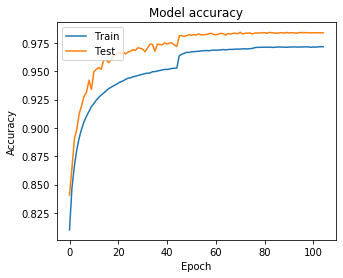

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(5, 4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

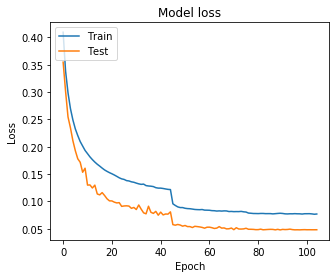

In [16]:
# Plot training & validation loss values
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
Ytrain_ = clf.predict(Xtrain) > 0.5
Yval_ = clf.predict(Xval) > 0.5

In [18]:
print('Training Results:')
print('=======================================')
print('Accuracy Score:', accuracy_score(Ytrain, Ytrain_))
print()
print('Log loss:', log_loss(Ytrain, Ytrain_))
print()
print('ROC_Accuracy_Score:', roc_auc_score(Ytrain, Ytrain_))
print()
print('Precision_Score:', precision_score(Ytrain, Ytrain_))
print()
print('Recall_Score:', recall_score(Ytrain, Ytrain_))
print()
print('F1_Score:', f1_score(Ytrain, Ytrain_))
print()
print('Confusion_Matrix:')
print(confusion_matrix(Ytrain, Ytrain_))
print()
print('Classification Report:')
print(classification_report(Ytrain, Ytrain_))
print()
print('Validation Results:')
print('=======================================')
print('Accuracy Score:', accuracy_score(Yval, Yval_))
print()
print('Log loss:', log_loss(Yval, Yval_))
print()
print('ROC_Accuracy_Score:', roc_auc_score(Yval, Yval_))
print()
print('Precision_Score:', precision_score(Yval, Yval_))
print()
print('Recall_Score:', recall_score(Yval, Yval_))
print()
print('F1_Score:', f1_score(Yval, Yval_))
print()
print('Confusion_Matrix:')
print(confusion_matrix(Yval, Yval_))
print()
print('Classification Report:')
print(classification_report(Yval, Yval_))
print()

Training Results:
Accuracy Score: 0.9900865489413889

Log loss: 0.3424063236914366

ROC_Accuracy_Score: 0.9900869663755733

Precision_Score: 0.9807286984794874

Recall_Score: 0.9998186664378874

F1_Score: 0.990181680903181

Confusion_Matrix:
[[502835  10076]
 [    93 512774]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    512911
           1       0.98      1.00      0.99    512867

    accuracy                           0.99   1025778
   macro avg       0.99      0.99      0.99   1025778
weighted avg       0.99      0.99      0.99   1025778


Validation Results:
Accuracy Score: 0.9842686179546571

Log loss: 0.5433551814337941

ROC_Accuracy_Score: 0.9842626238592587

Precision_Score: 0.9697000629476513

Recall_Score: 0.9997895106121732

F1_Score: 0.9845149366520135

Confusion_Matrix:
[[55185  1781]
 [   12 56998]]

Classification Report:
              precision    recall  f1-score   support

           0    

In [19]:
Xtest = pickle.load(open(data['Xtest'], 'rb'))
Xtest.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_34_match_status:1,id_34_match_status:2,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,0.001281,0.0,0.001569,0.000314,0.039398,0.0042,0.001054,0.0,0.0,0.008598,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663550,0.000640,0.0,0.000314,0.000314,0.004112,0.0014,0.000351,0.0,0.0,0.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663551,0.000427,0.0,0.000628,0.000000,0.007538,0.0014,0.000351,0.0,0.0,0.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663552,0.001067,0.0,0.000628,0.000000,0.002399,0.0028,0.000351,0.0,0.0,0.002865,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3663553,0.001281,0.0,0.001882,0.000000,0.004799,0.0042,0.001054,0.0,0.0,0.005730,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [20]:
Ytest_ = clf.predict_proba(Xtest)
Ytest_

array([[3.3766031e-05],
       [7.3611736e-06],
       [2.2381544e-04],
       ...,
       [2.3407876e-10],
       [1.4679492e-13],
       [1.6676329e-09]], dtype=float32)

In [23]:
SAMPLE_DIR = '../input/ieee-fraud-detection/sample_submission.csv'

In [24]:
submission = pd.read_csv(SAMPLE_DIR)
submission.head()

,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5


In [25]:
submission['isFraud'] = Ytest_
submission.head()

,TransactionID,isFraud
0,3663549,3.376603e-05
1,3663550,7.361174e-06
2,3663551,2.238154e-04
3,3663552,5.364418e-07
4,3663553,5.117059e-05


In [26]:
submission.to_csv('prediction_clf_ANN_03.csv', index=False)